## Importing Librariesany

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Explore Dataset

In [2]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:

df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.sample(4)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
4950,2,76,0,4,5,55.0
4218,2,71,1,4,2,48.0
7008,8,73,1,5,8,72.0
5169,6,96,1,9,1,88.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


In [7]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']
print(X.shape)
print(y.shape)

(10000, 5)
(10000,)


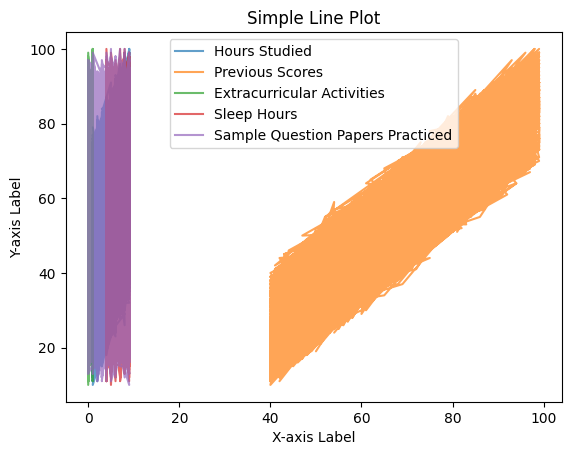

In [8]:
import matplotlib.pyplot as plt
plt.plot(X,y,alpha=0.7)
# Add labels and title
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Simple Line Plot")
plt.legend(X)
plt.show()

In [9]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [10]:
X.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

## Scalling of Data:

In [29]:
non_binary_cols = ['Hours Studied', 'Previous Scores',  'Sleep Hours', 'Sample Question Papers Practiced']
binary_cols = ['Extracurricular Activities']
scaler = StandardScaler()
X_scaled_part = scaler.fit_transform(df[non_binary_cols])

In [30]:
# Add back the binary column
X_scaled = np.column_stack([X_scaled_part, df['Extracurricular Activities'].values])
X_scaled.shape

(10000, 5)

In [31]:
X = pd.DataFrame(X_scaled,columns=non_binary_cols + binary_cols)
X.head(5)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities
0,0.775188,1.704176,1.456205,-1.249754,1.0
1,-0.383481,0.723913,-1.492294,-0.900982,0.0
2,1.161410,-1.063626,0.276805,-0.900982,1.0
3,0.002742,-1.005963,-0.902594,-0.900982,1.0
4,0.775188,0.320275,0.866505,0.145333,0.0


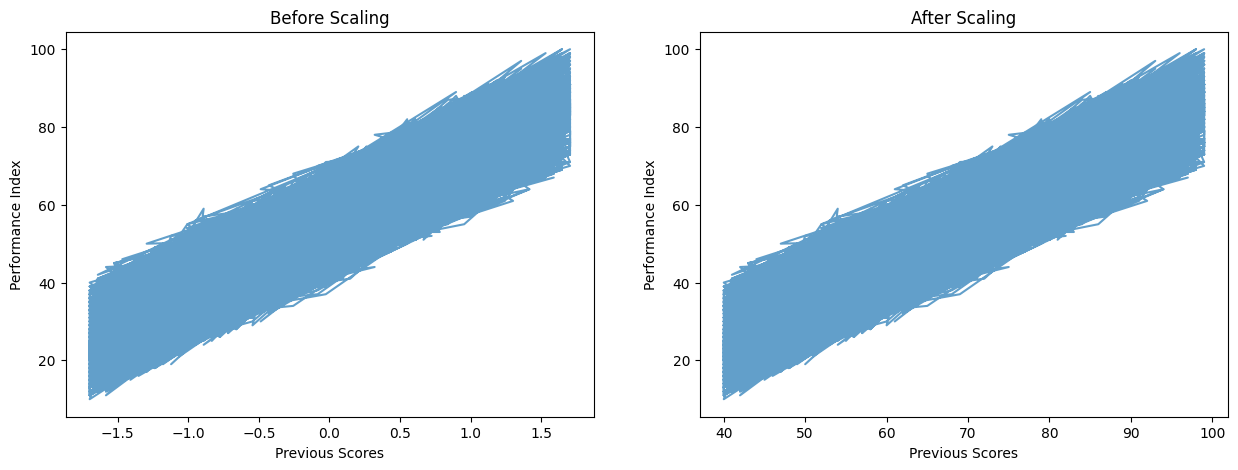

In [45]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X['Previous Scores'],y,alpha=0.7)
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.title("Before Scaling")

plt.subplot(1,2,2)
plt.plot(df['Previous Scores'],y,alpha=0.7)
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.title("After Scaling")

plt.show()

## Splitting the Data

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=14)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 5)
(2000, 5)
(8000,)
(2000,)


## MLR Model from sklearn

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = lr.predict(X_test)
print(y_pred.shape)

(2000,)


In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(mae, mse, rmse, r2*100)

1.6425806257962976 4.262251934900314 2.064522204990858 98.84358976894121


## Multiple Linear Regression By Code

In [20]:
class MLR:
    def __inti__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
            
    def predict(self, X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [21]:
mlr = MLR()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

In [22]:
r2_score(y_test,y_pred_mlr)*100

98.8435897689412

## Batch Gradient Descent Method

In [23]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.001,epochs=100): 
        self.intercept_ = None
        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # update all intercept And coef_
            yhat = np.dot(X_train, self.coef_) + self.intercept_
            # print(yhat.shape)
            
            intercept_der = -2*np.mean(y_train - yhat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train-yhat),X_train) / X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        print(self.intercept_, self.coef_)

            
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [24]:
gdr = GDRegressor(epochs=1000,learning_rate=0.1)

In [25]:
gdr.fit(X_train,y_train)

54.92612543630385 [ 7.38384241 17.67107     0.79785403  0.54317967  0.61357973]


In [26]:
y_pred = gdr.predict(X_test)

In [27]:
r2_score(y_test,y_pred)

0.9884358976894121

In [47]:
# 7	99	Yes	9	1	91.0

C:\Users\Bhimani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
# These are your feature columns
non_binary_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
binary_cols = ['Extracurricular Activities']

# Ask user for input
hours_studied = float(input("Enter Hours Studied: "))
previous_scores = float(input("Enter Previous Scores: "))
sleep_hours = float(input("Enter Sleep Hours: "))
sample_papers = float(input("Enter Sample Question Papers Practiced: "))
extra_activities = int(input("Extracurricular Activities (0 = No, 1 = Yes): "))

# Combine non-binary values into an array
X_new_non_binary = np.array([[hours_studied, previous_scores, sleep_hours, sample_papers]])

# Scale the non-binary part (using the same scaler trained earlier)
X_new_non_binary_scaled = scaler.transform(X_new_non_binary)

# Add back the binary column (not scaled)
X_new_full = np.column_stack([X_new_non_binary_scaled, np.array([[extra_activities]])])

# Predict
y_new_pred = lr.predict(X_new_full)

print("\n📊 Predicted Output:", y_new_pred[0])


Enter Hours Studied:  7
Enter Previous Scores:  99
Enter Sleep Hours:  9
Enter Sample Question Papers Practiced:  1
Extracurricular Activities (0 = No, 1 = Yes):  1



📊 Predicted Output: 91.86117413128093


C:\Users\Bhimani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Bhimani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
